In [ ]:
#import tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL
import pathlib
import glob

from tensorflow import keras
from tensorflow.keras import layers,Input
from tensorflow.keras.models import Sequential
import os

In [ ]:
data_dir=os.chdir('/content/drive/MyDrive/space_images_1')

In [ ]:
data_dir='/content/drive/MyDrive/space_images_1'

In [ ]:
print(data_dir)

/content/drive/MyDrive/space_images_1


In [ ]:
image_exts = ['jpeg', 'png', 'jpg', 'bmp']

In [ ]:
from PIL import Image
import os
import imghdr

for image_class in os.listdir(data_dir):
    print(f"data_dir: {data_dir}")
    print(f"image_class: {image_class}")
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # Check if the image type is valid
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                os.remove(image_path)
            else:
                # Re-save the image to strip away the incorrect sRGB profile
                with Image.open(image_path) as img:
                    img = img.convert("RGB")  # Ensure it's in RGB mode
                    # if img.mode == 'P':
                    #      img = img.convert('RGBA')
                    img.save(image_path, format='PNG')  # Save back as PNG
        except Exception as e:
            print(f'Issue with image {image_path}: {e}')
            os.remove(image_path)

data_dir: /content/drive/MyDrive/space_images_1
image_class: planets
data_dir: /content/drive/MyDrive/space_images_1
image_class: galaxies
data_dir: /content/drive/MyDrive/space_images_1
image_class: nebula
data_dir: /content/drive/MyDrive/space_images_1
image_class: constellation
data_dir: /content/drive/MyDrive/space_images_1
image_class: stars


In [ ]:
os.listdir()

['planets', 'galaxies', 'nebula', 'constellation', 'stars']

# New Section

In [ ]:
img=plt.imread('planets/1.jpg')

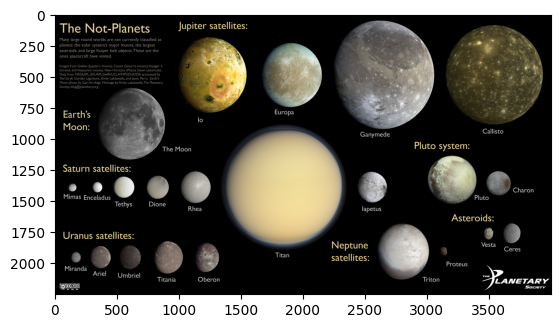

In [ ]:
plt.imshow(img)

Number of labels

In [ ]:
image_count=len(list(glob.glob("/content/drive/MyDrive/space_images_1/*")))

In [ ]:
image_count

5

Number of images

In [ ]:
image_count=len(list(glob.glob("/content/drive/MyDrive/space_images_1/*/*.jpg")))

In [ ]:
image_count

818

Look at some sample images

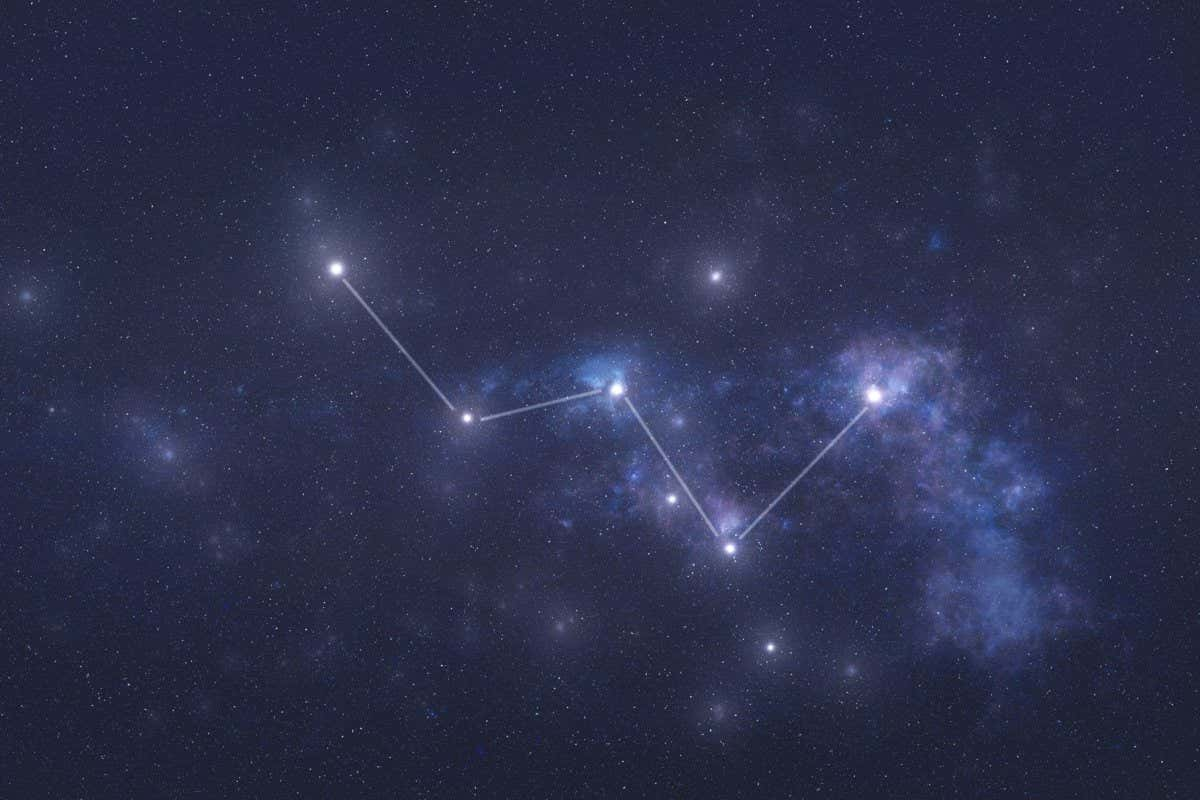

In [ ]:
constellation=list(glob.glob("/content/drive/MyDrive/space_images_1/constellation/*.jpg"))
PIL.Image.open(str(constellation[0]))

In [ ]:
str(constellation[50])

'/content/drive/MyDrive/space_images_1/constellation/20.jpg'

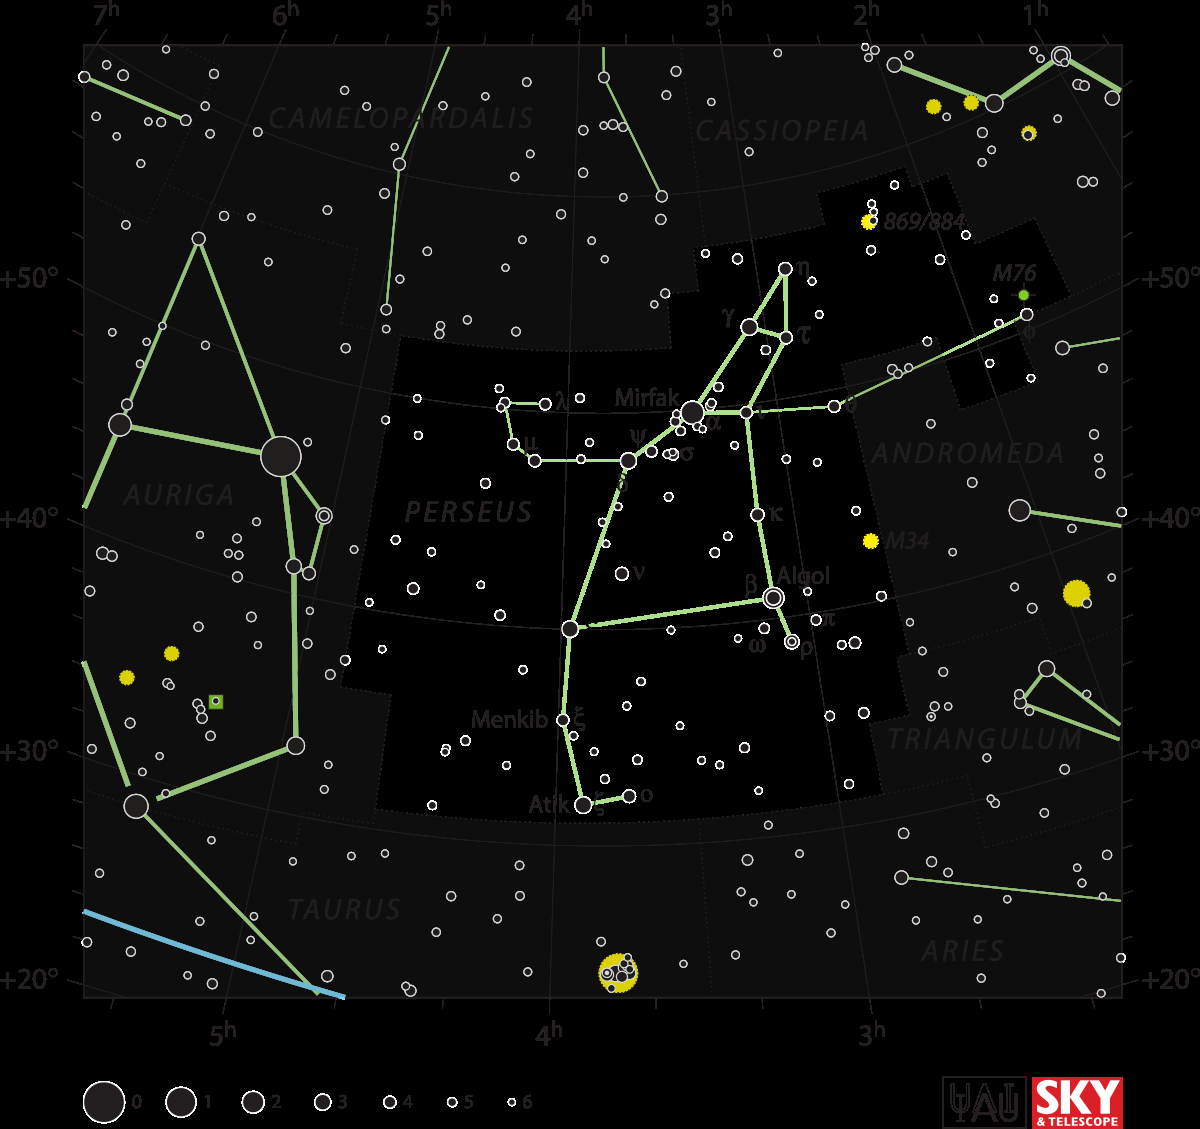

In [ ]:
PIL.Image.open(str(constellation[17]))

Load the images off disk using Keras utility.    
tf.keras.utils.image_dataset_from_directory


Create dataset

In [ ]:
batch_size=32
img_height=180
img_width=180

Using validation split (80% of images for training and 20% for validation)

In [ ]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/space_images_1",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 818 files belonging to 5 classes.
Using 655 files for training.


In [ ]:
val_ds=tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/space_images_1",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)


Found 818 files belonging to 5 classes.
Using 163 files for validation.


In [ ]:
class_names=train_ds.class_names
print(class_names)

['constellation', 'galaxies', 'nebula', 'planets', 'stars']


Visualize data set

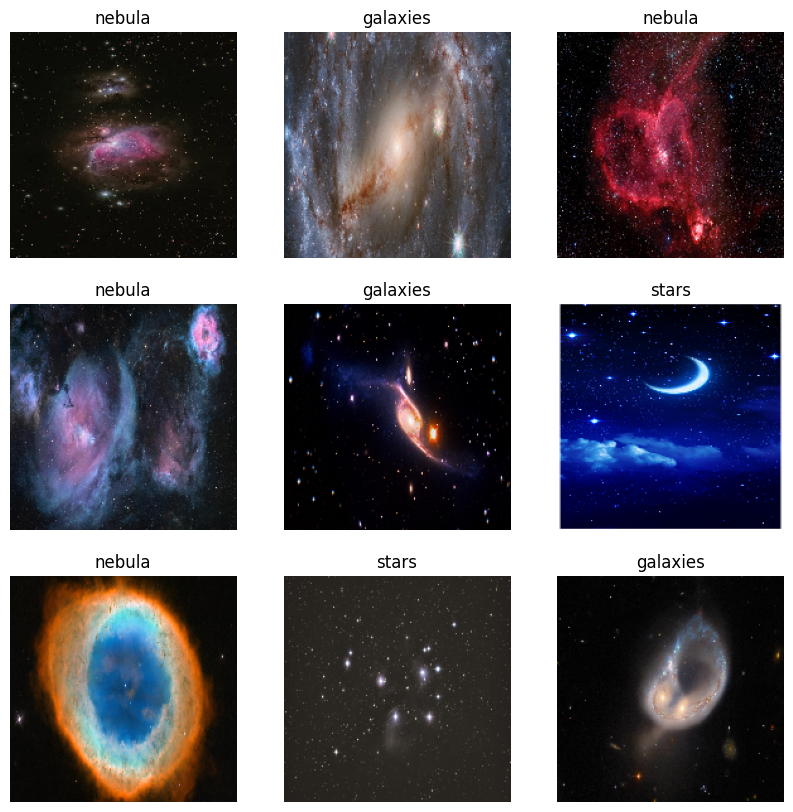

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch,labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


Model creation that includes data standardization


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

# model = models.Sequential([
#     layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

#     # First convolutional layer
#     layers.Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu'),
#     layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

#     # Second convolutional layer
#     layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
#     layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

#     # Third, fourth, and fifth convolutional layers
#     layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
#     layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
#     layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
#     layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

#     # Flatten and fully connected layers
#     layers.Flatten(),
#     layers.Dense(4096, activation='relu'),
#     layers.Dropout(0.5),  # Dropout layer for regularization
#     layers.Dense(4096, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(num_classes, activation='softmax')  # Output layer
# ])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

Compile model


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',  # Set from_logits=False
#               metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds
val_ds = val_ds

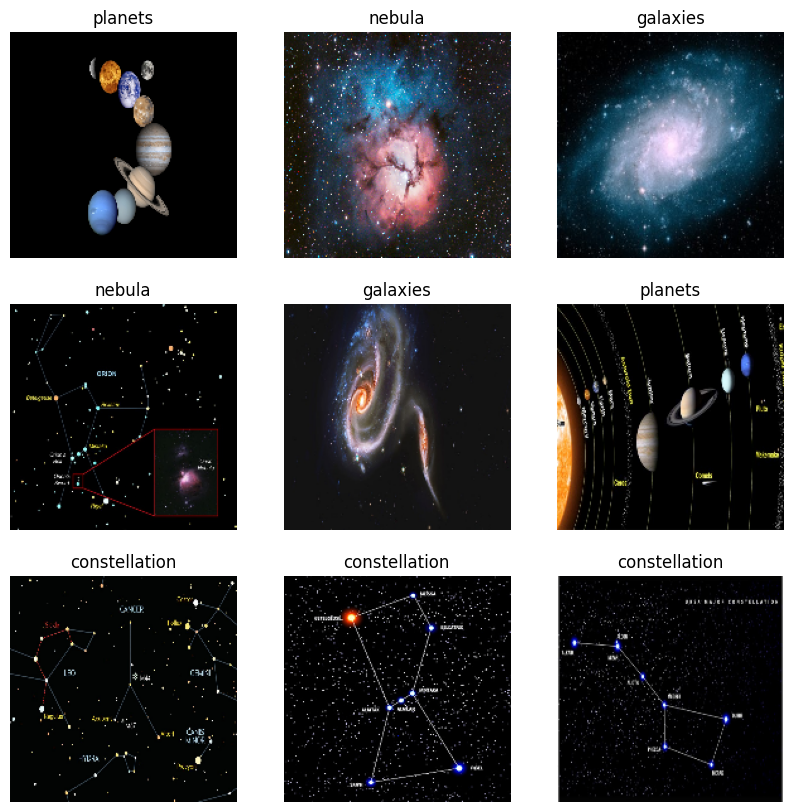

In [ ]:
plt.figure(figsize=(10,10))
for images, labels  in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.2490 - loss: 1.6618 - val_accuracy: 0.3558 - val_loss: 1.4966
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.4221 - loss: 1.4240 - val_accuracy: 0.3742 - val_loss: 1.4377
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4587 - loss: 1.2484 - val_accuracy: 0.4785 - val_loss: 1.3435
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6328 - loss: 0.9271 - val_accuracy: 0.5583 - val_loss: 1.2173
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7369 - loss: 0.6915 - val_accuracy: 0.5337 - val_loss: 1.4441
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8317 - loss: 0.4605 - val_accuracy: 0.5644 - val_loss: 1.5675
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9200 - loss: 0.2478 - val_accuracy: 0.5276 - val_loss: 1.9318
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9546 - loss: 0.1902 - val_accuracy: 0.5153 - val_loss:

Visualize training results

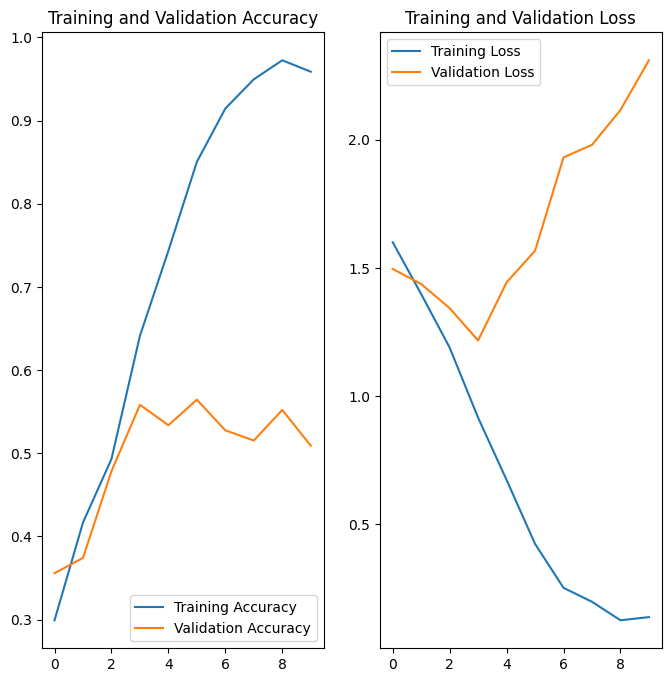

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()

We have a model with validation accuracy of <=55%

Overfitting

Data augmentation

Dropout

Training accuracy increases linearly over time whereas validation accuracy stalls around 55% of training process.
This is sign of overfitting that occurs do to small number of trining examples.
The model learns from noises and unwanted details from training examples.The model has difficult time generalizing to a new dataset.
It negatively impacts performance


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.RandomBrightness(0.1),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1)
  ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


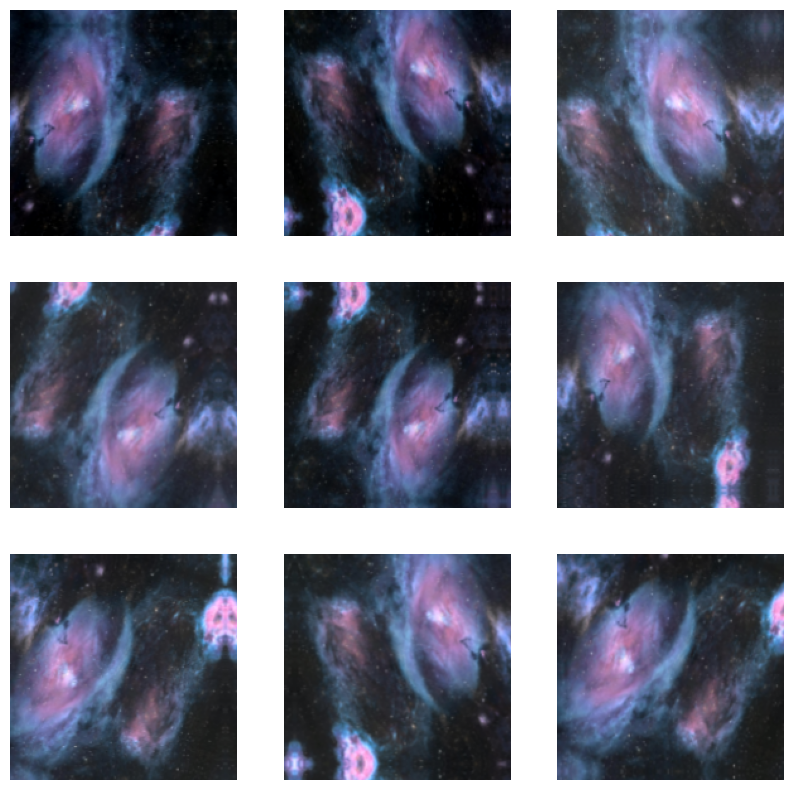

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Apply random transformations on images that yield believable looking images.
It helps generalize better.   
tf.keras.layers.RandomFlip   
tf.keras.layers.RandomRotation   
tf.keras.layers.RandomZoom   

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:

# # Construct the AlexNet-like model
# model = models.Sequential([
#     data_augmentation,
#     layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

#     # First convolutional layer
#     layers.Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu'),
#     layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

#     # Second convolutional layer
#     layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
#     layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

#     # Third convolutional layer
#     layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
#     layers.Conv2D(384, (3, 3), padding='same', activation='relu'),

#     # Fifth convolutional layer
#     layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
#     layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

#     # Flatten and fully connected layers
#     layers.Flatten(),
#     layers.Dense(4096, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(4096, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(num_classes, activation='softmax', name="outputs")  # Output layer
# ])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputs (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# model.compile(optimizer='adam',
#               loss="SparseCategoricalCrossentropy",
#               metrics=['accuracy'])

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.2411 - loss: 1.7208 - val_accuracy: 0.3190 - val_loss: 1.5446
Epoch 2/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.3514 - loss: 1.4650 - val_accuracy: 0.4049 - val_loss: 1.4269
Epoch 3/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.4061 - loss: 1.3911 - val_accuracy: 0.4233 - val_loss: 1.5524
Epoch 4/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4251 - loss: 1.2964 - val_accuracy: 0.5337 - val_loss: 1.2535
Epoch 5/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.4850 - loss: 1.2211 - val_accuracy: 0.5828 - val_loss: 1.1515
Epoch 6/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4829 - loss: 1.2106 - val_accuracy: 0.5583 - val_loss: 1.2591
Epoch 7/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.5418 - loss: 1.1401 - val_accuracy: 0.5644 - val_loss: 1.1789
Epoch 8/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5578 - loss: 1.1195 - val_accuracy: 0.5521 - val_loss:

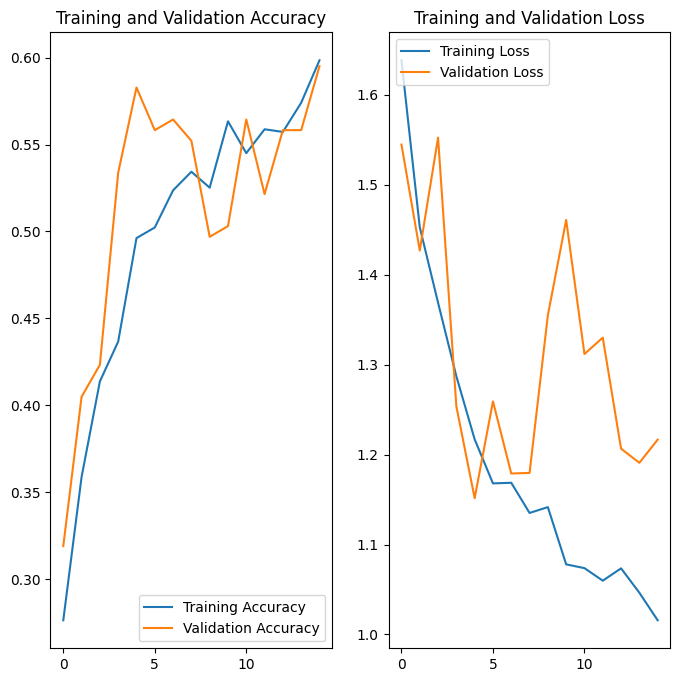

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()

Dropout regularization to a network.
App;y drop out to a layer ,it randomly drops out a number of output units from the layer during training process.Dropout takes a fractional number as input ,drop output units randomly from the applied layer.

Can it be explained??

Predictions: tf.Tensor([[-0.10705172  1.1008263  -2.0620575  -0.429041   -0.08372755]], shape=(1, 5), dtype=float32)
Shape of predictions: (1, 5)
Predicted class index: 1
Predicted class: galaxies
Predicted class probability: 1.1008263
Gradients: [[[[ 2.0024431e-06 -1.7649774e-06 -3.1985954e-07]
   [ 3.4999171e-06 -2.1119258e-06 -1.8110682e-06]
   [ 9.9998203e-07  1.3692962e-06 -1.2395624e-06]
   ...
   [ 4.2020855e-07 -3.8025073e-07 -1.4999716e-06]
   [ 1.8682159e-06  2.3258303e-07 -2.3045702e-06]
   [ 2.5645763e-06 -9.0543136e-07 -9.9718829e-07]]

  [[ 3.2540067e-06 -4.9567257e-07  1.3266491e-07]
   [ 5.7950124e-06 -2.3125235e-06 -2.3442487e-06]
   [ 2.5788750e-06  1.2461891e-06 -2.3335688e-06]
   ...
   [-9.7811863e-08  5.1051552e-07  8.8196629e-08]
   [ 1.5772333e-06  5.8791773e-07 -7.4700665e-07]
   [ 1.4119272e-06 -1.4813403e-07  1.5558709e-07]]

  [[ 3.8917005e-06 -4.1928357e-07  5.8328118e-07]
   [ 4.0907698e-06 -2.7394296e-07 -1.3619165e-06]
   [-6.2128711e-09  1.9332024e-06 -

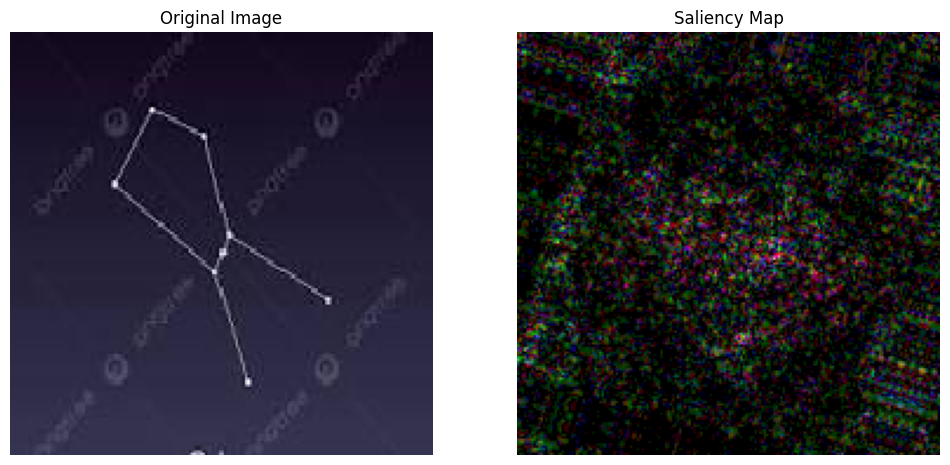

In [ ]:
from tensorflow.keras.preprocessing import image

constellation_path =('/content/drive/MyDrive/constellation.jpeg')

img = tf.keras.utils.load_img(
    constellation_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
img_array /= 255.0

img_tensor = tf.convert_to_tensor(img_array)

# Use tf.GradientTape to compute gradients
with tf.GradientTape() as tape:
    tape.watch(img_array)  # Watch the input image tensor
    predictions = model(img_array)  # Make predictions
    # Make predictions

    print("Predictions:", predictions)
    print("Shape of predictions:", predictions.shape)

    class_index = tf.argmax(predictions[0])  # Get the predicted class

    # Print class index
    print("Predicted class index:", class_index.numpy())
    print("Predicted class:",class_names[class_index.numpy()])


predicted_class_probability = predictions[0][class_index]
print("Predicted class probability:", predicted_class_probability.numpy())

model.trainable = False

# Calculate loss and gradients
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
with tf.GradientTape() as tape:
    tape.watch(img_array)
    predictions = model(img_array)
    loss = loss_fn(tf.convert_to_tensor([class_index]), predictions)

# Compute gradients
grads = tape.gradient(loss, img_array)

# Check if grads is None
if grads is None:
    raise ValueError("Gradients could not be computed. Check the model output and input.")

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

saliency_map = tf.abs(grads)  # Use absolute values

print("Gradients:", grads.numpy())

# Check for NaN or Inf values
if tf.reduce_any(tf.math.is_nan(saliency_map)) or tf.reduce_any(tf.math.is_inf(saliency_map)):
    raise ValueError("Saliency map contains NaN or Inf values.")

# Normalize the saliency map
saliency_map = saliency_map / tf.reduce_max(saliency_map + 1e-10)  # Add a small epsilon to avoid division by zero

# Normalize the saliency map with a dynamic range
saliency_map = (saliency_map - np.min(saliency_map)) / (np.max(saliency_map) - np.min(saliency_map) + 1e-10)

# Convert saliency_map to a NumPy array if it's a tensor
saliency_map = saliency_map.numpy() if isinstance(saliency_map, tf.Tensor) else saliency_map

# Optionally apply a threshold to enhance visibility
threshold = 0.1  # You can adjust this value
saliency_map[saliency_map < threshold] = 0

# Clip values to ensure they are within [0, 1]
saliency_map = np.clip(saliency_map, 0, 1)

# Convert to NumPy for visualization
saliency_map = tf.squeeze(saliency_map).numpy()  # Remove batch dimension

# Check the saliency map for valid range (0 to 1)
print("Saliency Map Min:", np.min(saliency_map))
print("Saliency Map Max:", np.max(saliency_map))

original_image_np = img_array[0]  # Get the original image without batch dimension

# Plot the original image and the saliency map
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image_np)  # Display the original image
plt.axis('off')  # Hide axes

plt.subplot(1, 2, 2)
plt.title("Saliency Map")
plt.imshow(saliency_map, cmap='hot')  # Display the saliency map
plt.axis('off')  # Hide axes

# plt.subplot(1, 2, 2)
# plt.title("Saliency Map")
# plt.imshow(saliency_map, cmap='viridis')  # Experiment with colormap
# plt.axis('off')  # Hide axes

plt.show()

Predictions: tf.Tensor([[-0.17376977  1.0935465  -1.993165   -0.5004055   0.00936915]], shape=(1, 5), dtype=float32)
Shape of predictions: (1, 5)
Predicted class index: 1
Predicted class probability: 0.5352


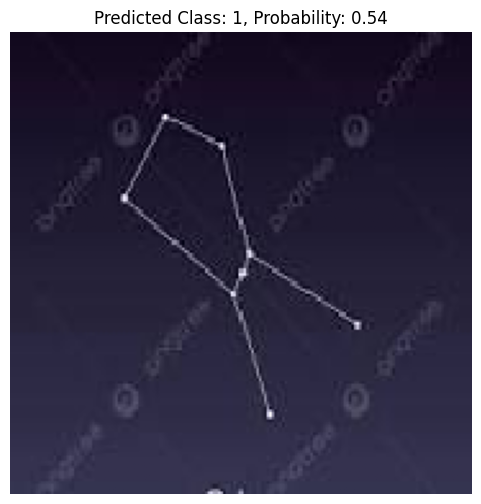

In [ ]:
def load_and_preprocess_image(image_path):
    # Load the image
    img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
    # Convert the image to an array
    img_array = tf.keras.utils.img_to_array(img)
    # Expand dimensions to create a batch of size 1
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize the image
    img_array /= 255.0
    return img_array

image_path = '/content/drive/MyDrive/constellation.jpeg'  # Update this to your image path
img_tensor = load_and_preprocess_image(image_path)

# Make predictions
predictions = model(img_tensor)
predicted_class_index = tf.argmax(predictions[0]).numpy()  # Get the predicted class index
predicted_class_probability = tf.nn.softmax(predictions[0])[predicted_class_index].numpy()  # Get the probability

print("Predictions:", predictions)
print("Shape of predictions:", predictions.shape)
# Display the results
print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class probability: {predicted_class_probability:.4f}")

# Visualize the input image
plt.figure(figsize=(6, 6))
plt.imshow(img_tensor[0])  # Display the original image
plt.axis('off')  # Hide axes
plt.title(f'Predicted Class: {predicted_class_index}, Probability: {predicted_class_probability:.2f}')
plt.show()